In [1]:
import os

In [2]:
import sys

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math

from sklearn.preprocessing import StandardScaler

from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

from tsad.evaluating.evaluating import evaluating # requires cython <3 and pip install --no-build-isolation scikit-learn

import warnings
warnings.filterwarnings('ignore')

/var/folders/tz/nj1np8hj5sn9b_q8m1628ssr0000gn/T/ipykernel_8540/1163209346.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/skoltech-anomaly-benchmark-skab/SKAB/.DS_Store
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/6.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/7.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/5.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/4.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/0.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/1.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/3.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/2.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/15.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/14.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/10.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/11.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/13.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/12.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/9.csv
input/skoltech-anomaly-benchmark-skab/SKAB/valve1/8.csv
input/skoltech-anomaly-benchmark-skab/SKAB/ot

In [4]:
all_files=[]
for dirname,_,filenames in os.walk('input'):
    for filename in filenames:
        if filename.endswith('csv'):
            all_files.append(f'{dirname}/{filename}')
all_files.sort()

valve1_dat={file.split('/')[-1]:pd.read_csv(file,sep=';',index_col='datetime',parse_dates=True)
              for file in all_files if 'valve1' in file}

#concatenate data(order in time series by sort_index)
valve1_data=pd.concat(list(valve1_dat.values()),axis=0).sort_index()
display(valve1_data)

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 10:14:33,0.026588,0.040111,1.330200,0.054711,79.3366,26.0199,233.062,32.0000,0.0,0.0
2020-03-09 10:14:34,0.026170,0.040452,1.353990,0.382638,79.5158,26.0258,236.040,32.0000,0.0,0.0
2020-03-09 10:14:35,0.026199,0.039419,1.540060,0.710565,79.3756,26.0265,251.380,32.0000,0.0,0.0
2020-03-09 10:14:36,0.026027,0.039641,1.334580,0.382638,79.6097,26.0393,234.392,32.0000,0.0,0.0
2020-03-09 10:14:37,0.026290,0.040273,1.078510,-0.273216,79.6109,26.0420,225.342,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 15:34:37,0.027605,0.039760,0.622996,0.382638,68.4247,24.4370,230.358,32.9673,0.0,0.0
2020-03-09 15:34:38,0.027286,0.039613,0.600692,0.054711,68.0598,24.4356,231.373,32.0000,0.0,0.0
2020-03-09 15:34:39,0.027202,0.041440,0.450323,0.054711,68.1836,24.4379,210.605,32.0337,0.0,0.0


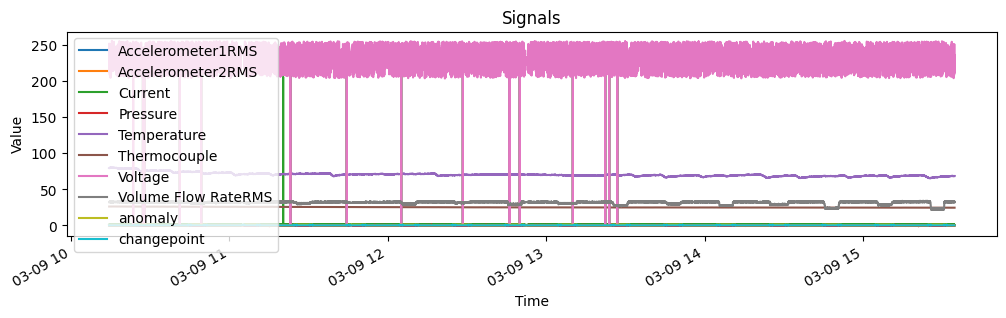

In [5]:
# random dataset visualizing
valve1_data.plot(figsize=(12, 3))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


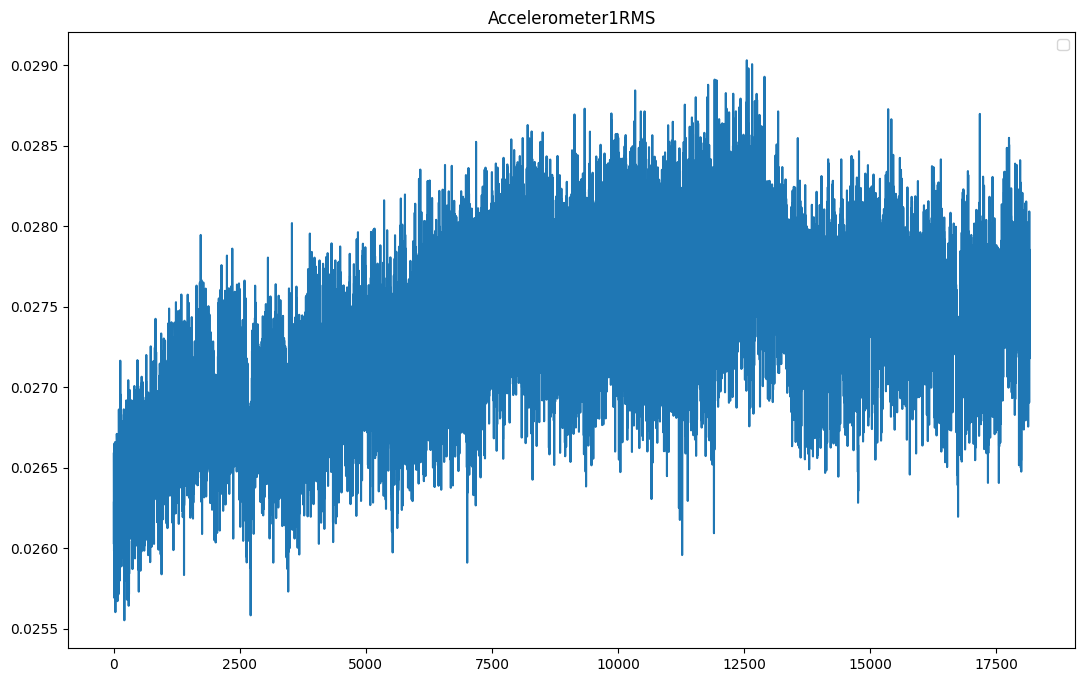

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


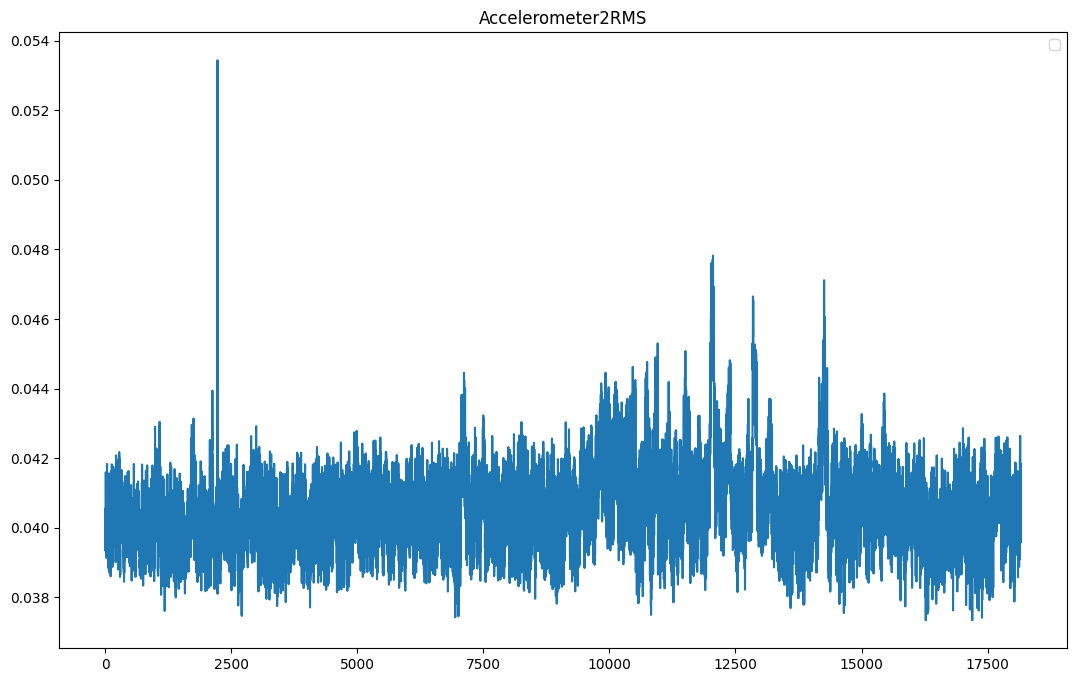

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


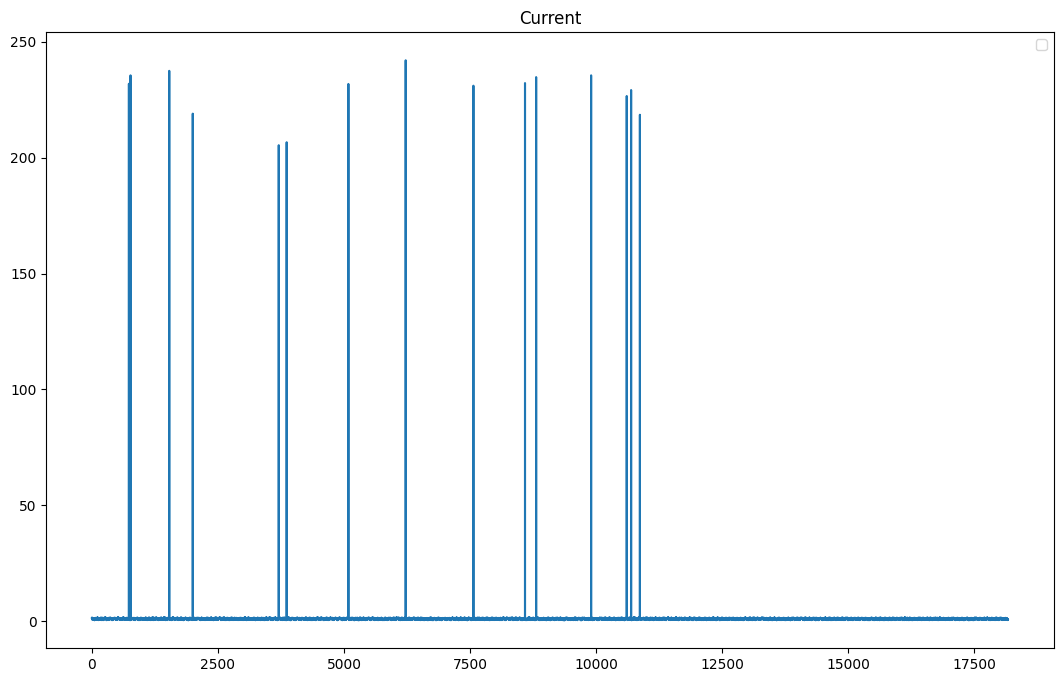

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


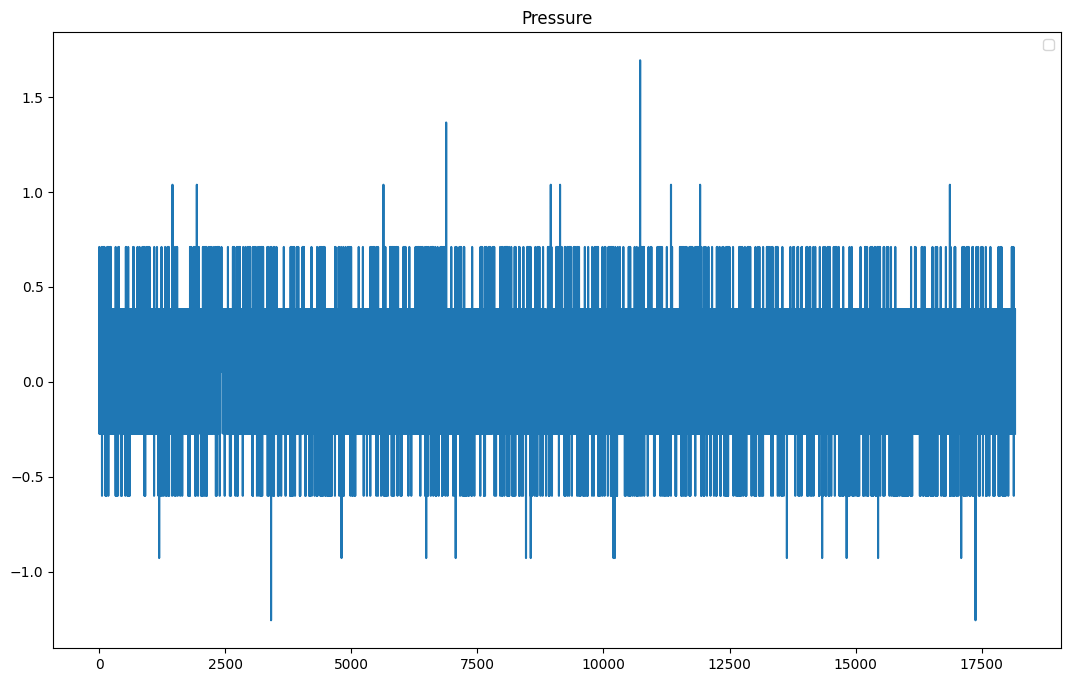

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


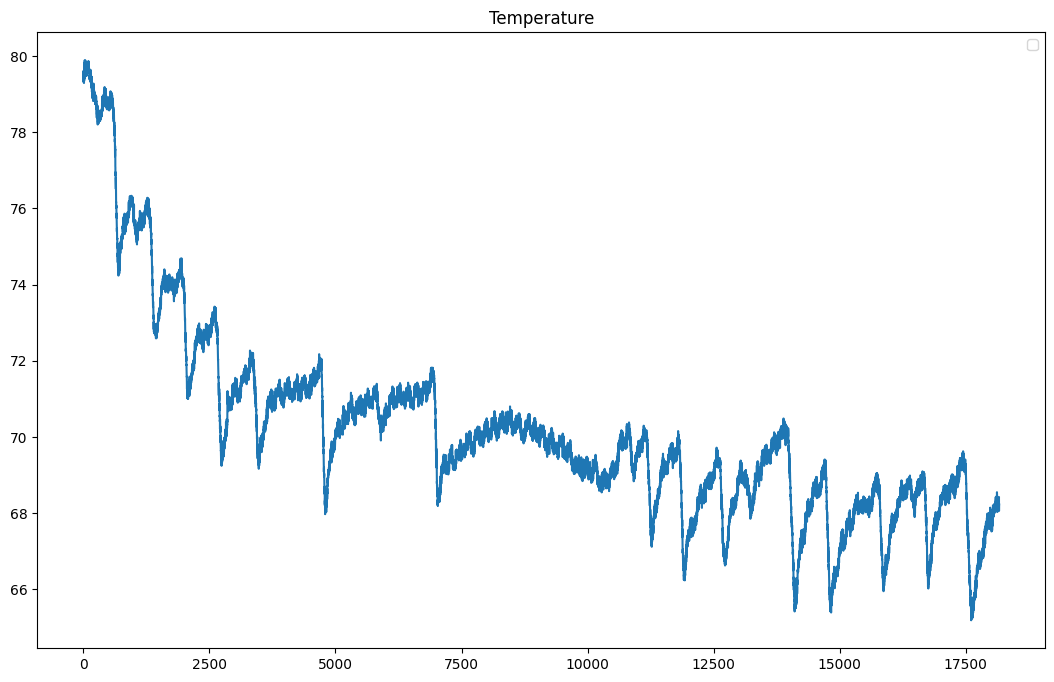

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


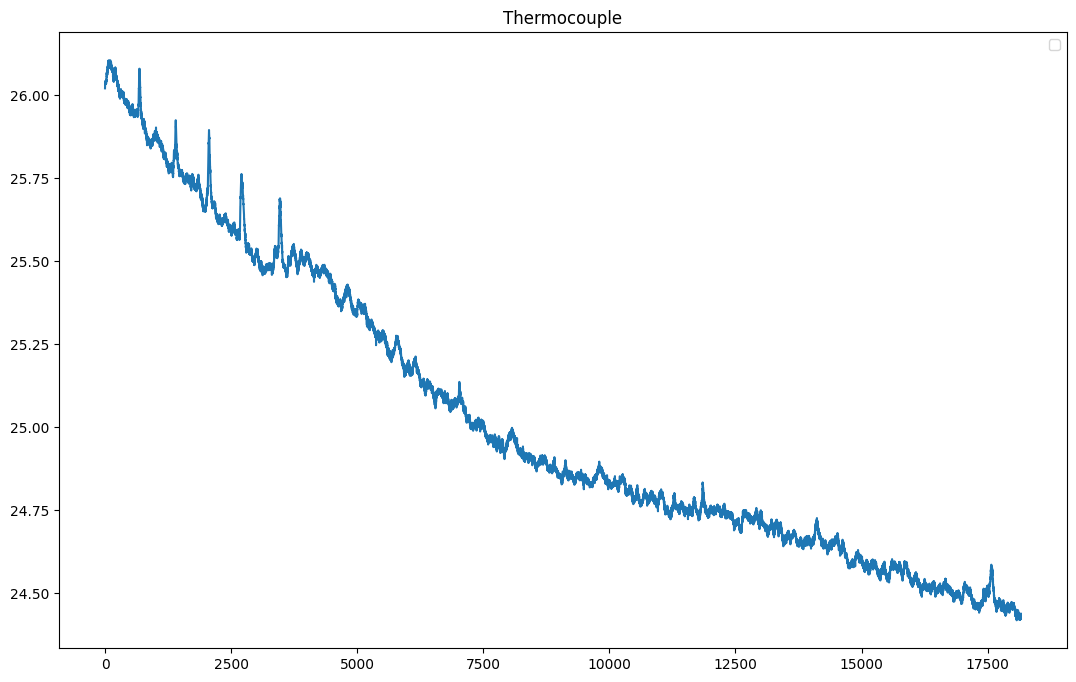

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


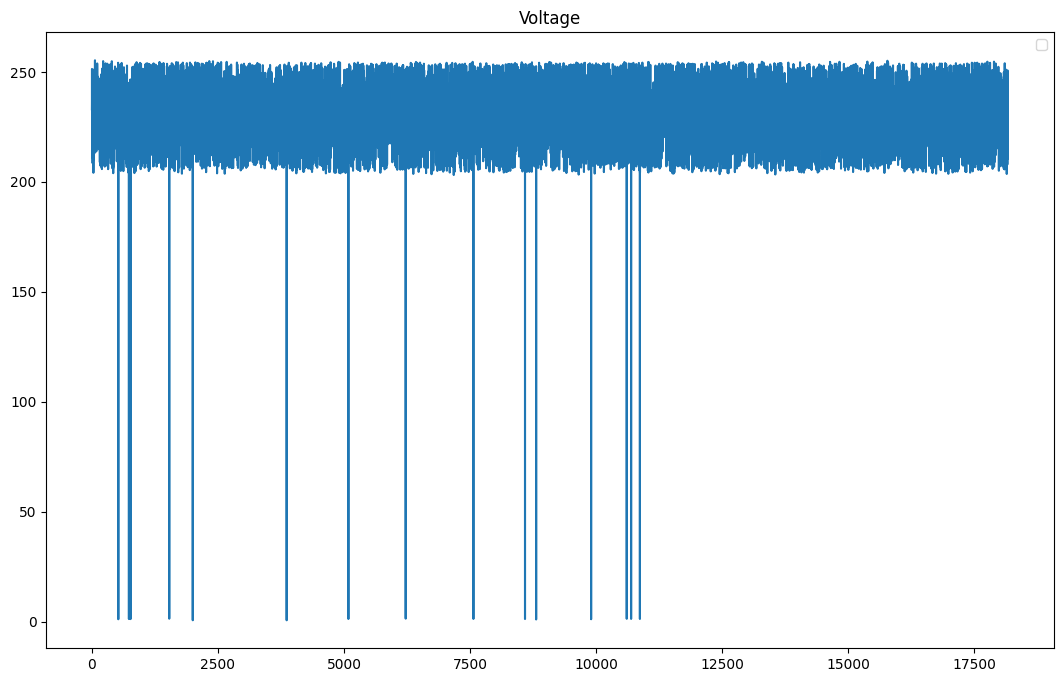

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


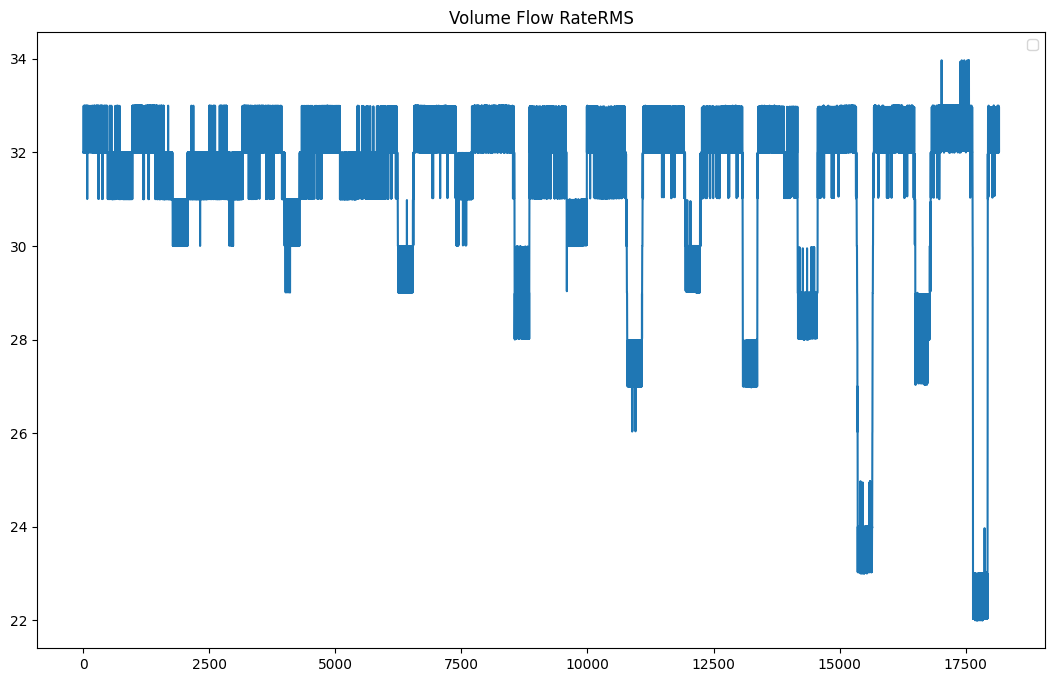

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


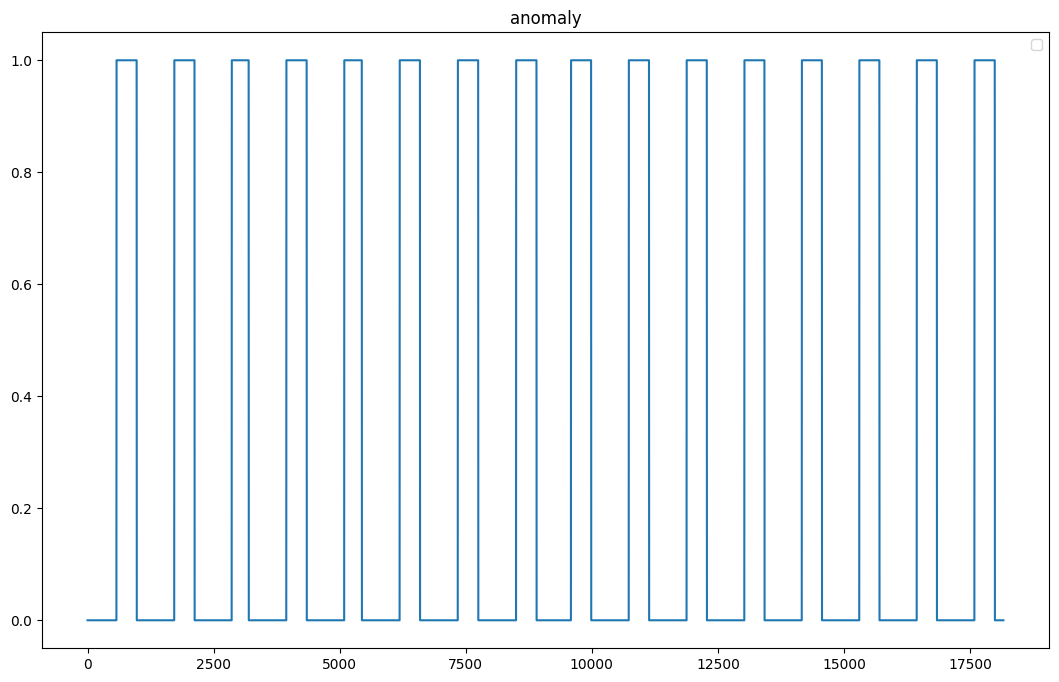

In [6]:
for column in valve1_data.columns[:-1]:
    plt.figure(figsize=(13,8))
    plt.plot(valve1_data[column].values)
    ax=plt.gca()
    
    plt.legend()
    plt.title(column)
    plt.show()

In [7]:
#train_pre(valve1_data is dataframe)
train_pre=valve1_data

#train_pre ⇒ train:valid_pre=7:3
train_pre_size=len(train_pre)
train_size=int(train_pre_size*0.7)
train=train_pre[0:train_size]
x_train_pre=train.drop('anomaly',axis=1)
x_train=x_train_pre.drop('changepoint',axis=1)
y_train=train['anomaly'].values

#valid_pre ⇒ valid:test=2:1
valid_pre_size=train_pre_size-train_size
valid_size=int(valid_pre_size*0.66)
valid=train_pre[train_size:train_size+valid_size]
x_valid_pre=valid.drop('anomaly',axis=1)
x_valid=x_valid_pre.drop('changepoint',axis=1)
y_valid=valid['anomaly'].values

test=train_pre[train_size+valid_size:]
x_test_pre=test.drop('anomaly',axis=1)
x_test=x_test_pre.drop('changepoint',axis=1)
y_test=test['anomaly'].values

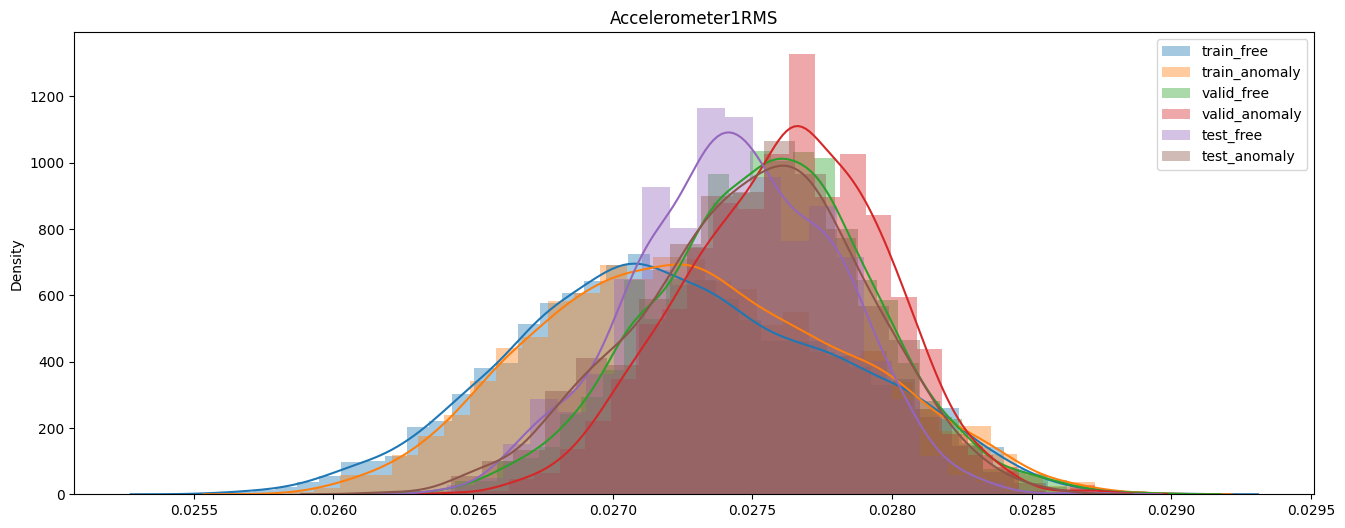

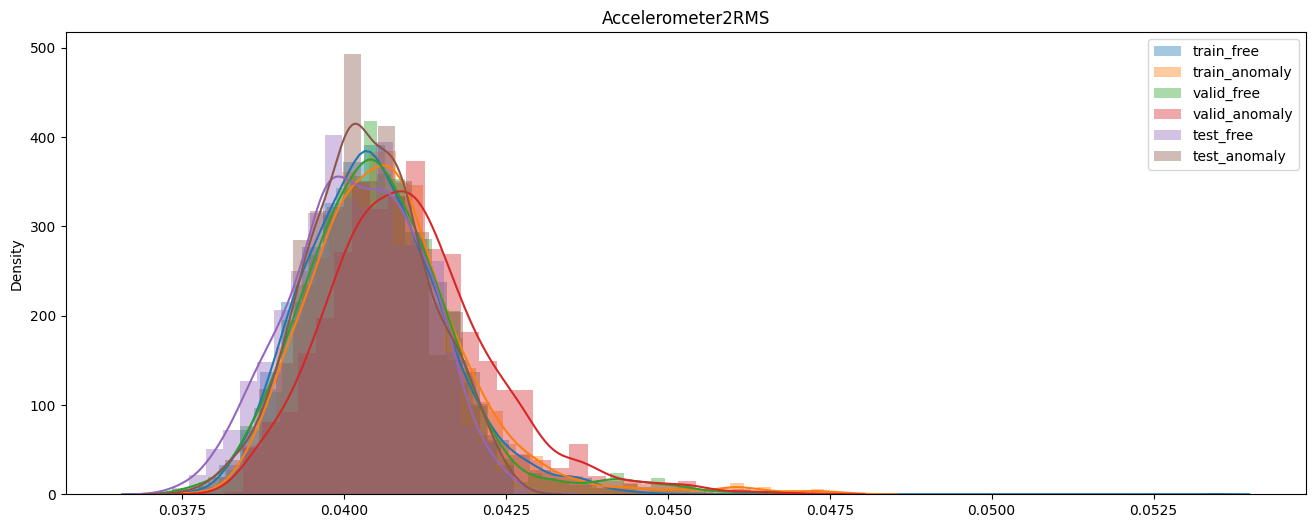

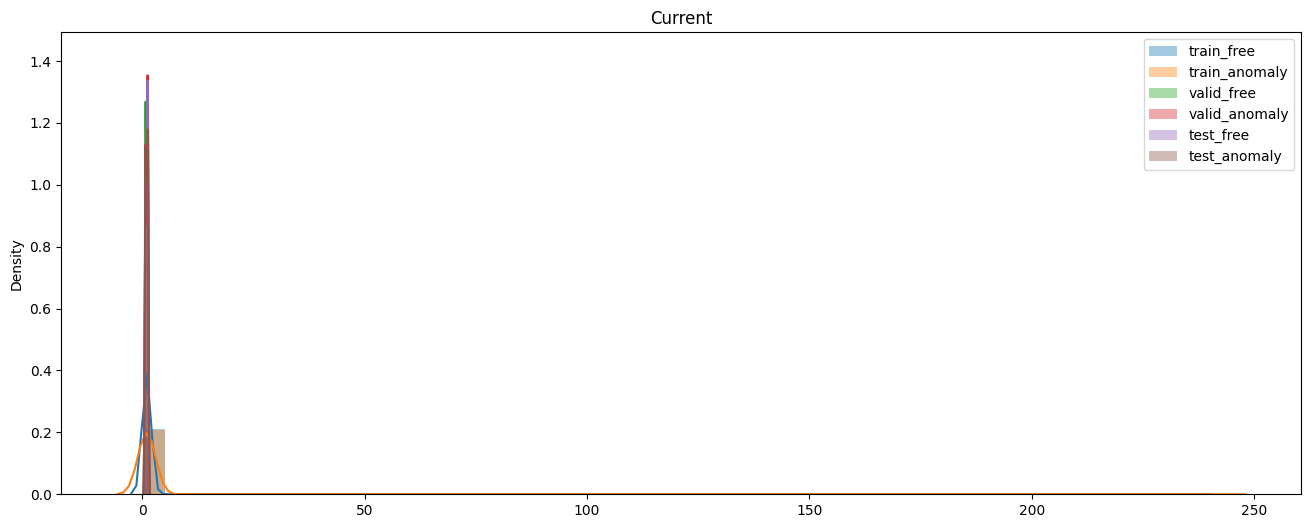

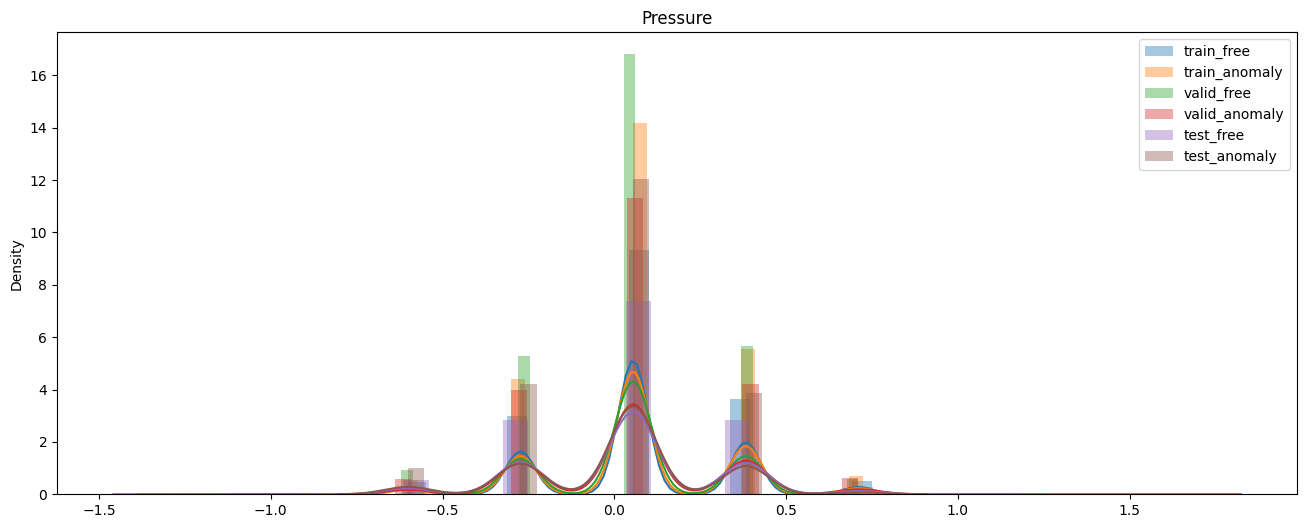

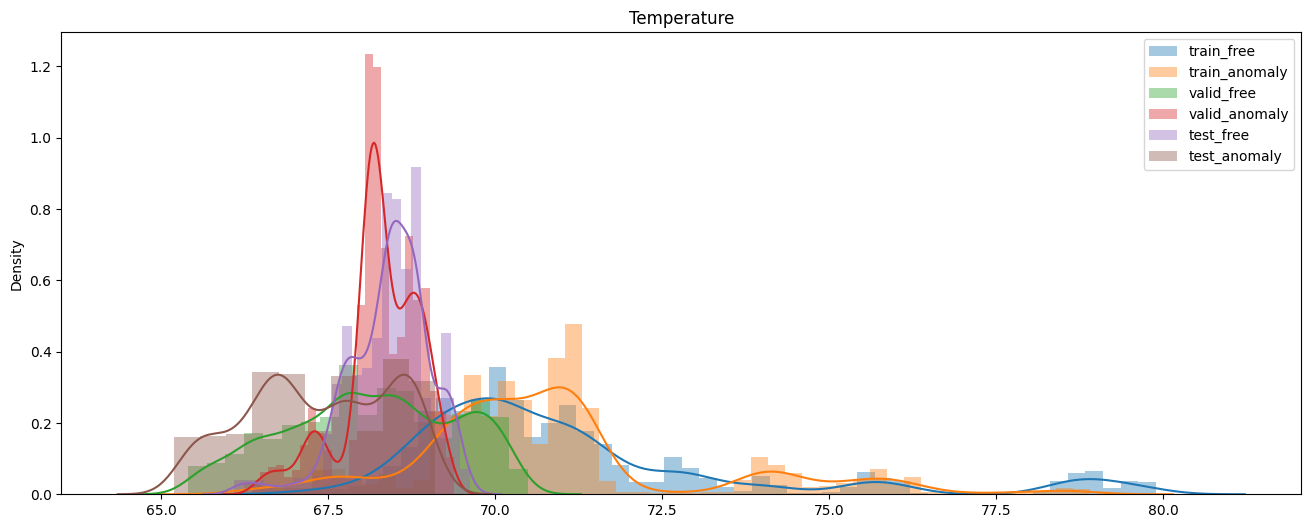

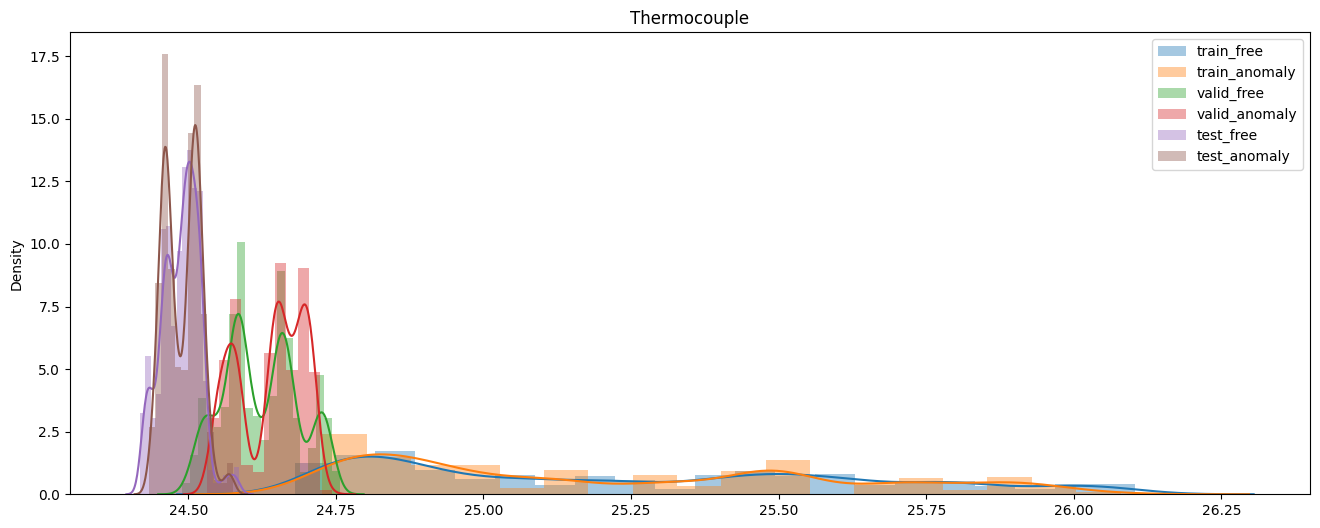

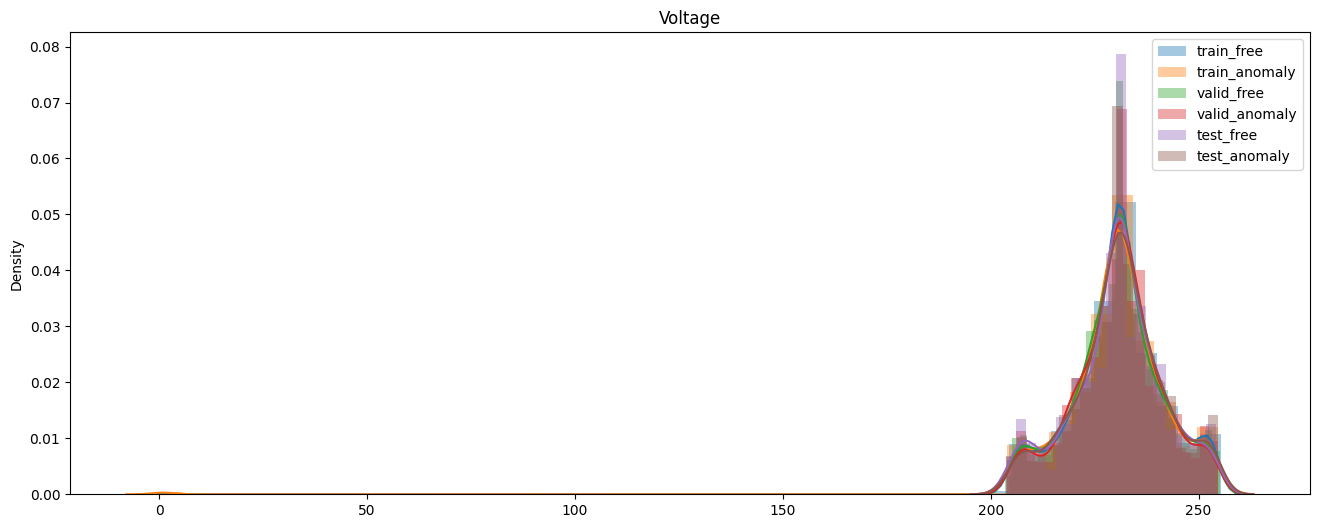

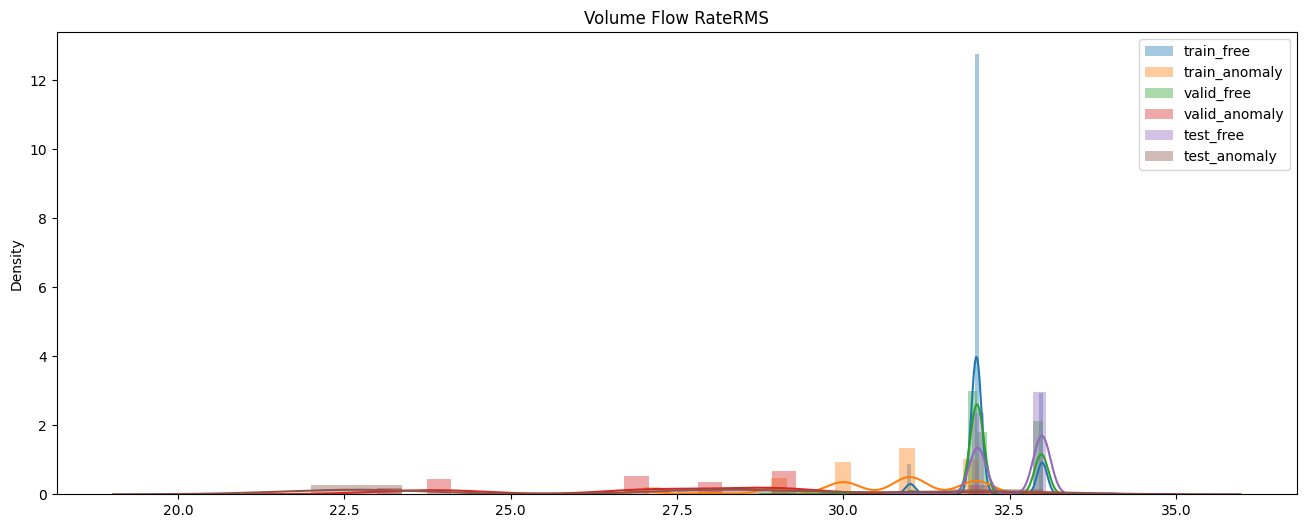

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

#*** split into free and anomaly ***
def free_anomaly_split(X,Y):
    free=[]
    anomaly=[]
    
    for x,y in zip(X,Y):
        if y==0:
            free.append(x)
        elif y==1:
            anomaly.append(x)
    
    free=np.array(free)
    anomaly=np.array(anomaly)
        
    return free,anomaly

x_train_free,x_train_anomaly=free_anomaly_split(x_train.values,y_train)
x_valid_free,x_valid_anomaly=free_anomaly_split(x_valid.values,y_valid)
x_test_free,x_test_anomaly=free_anomaly_split(x_test.values,y_test)

#histgram of normal and anomaly
features={1:'Accelerometer1RMS',2:'Accelerometer2RMS',3:'Current',4:'Pressure',5:'Temperature',6:'Thermocouple',7:'Voltage',8:'Volume Flow RateRMS'}
bins=None

for key,col in features.items():
    plt.figure(figsize=(16,6))
    sns.distplot(x_train_free[:,key-1],bins=bins,label='train_free')
    sns.distplot(x_train_anomaly[:,key-1],bins=bins,label='train_anomaly')
    sns.distplot(x_valid_free[:,key-1],bins=bins,label='valid_free')
    sns.distplot(x_valid_anomaly[:,key-1],bins=bins,label='valid_anomaly')
    sns.distplot(x_test_free[:,key-1],bins=bins,label='test_free')
    sns.distplot(x_test_anomaly[:,key-1],bins=bins,label='test_anomaly')   
    
    plt.title(col)
    plt.legend()
    plt.show()

In [9]:
def smooth_curve(x):
    #x=1 dimension array
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

x_train_win=np.zeros_like(x_train.values)
x_valid_win=np.zeros_like(x_valid.values)
x_test_win=np.zeros_like(x_test.values)

data_dim=8
for i in range(0,data_dim):
    x_train_win[:,i]=smooth_curve(x_train.values[:,i].flatten())
    x_valid_win[:,i]=smooth_curve(x_valid.values[:,i].flatten())
    x_test_win[:,i]=smooth_curve(x_test.values[:,i].flatten())

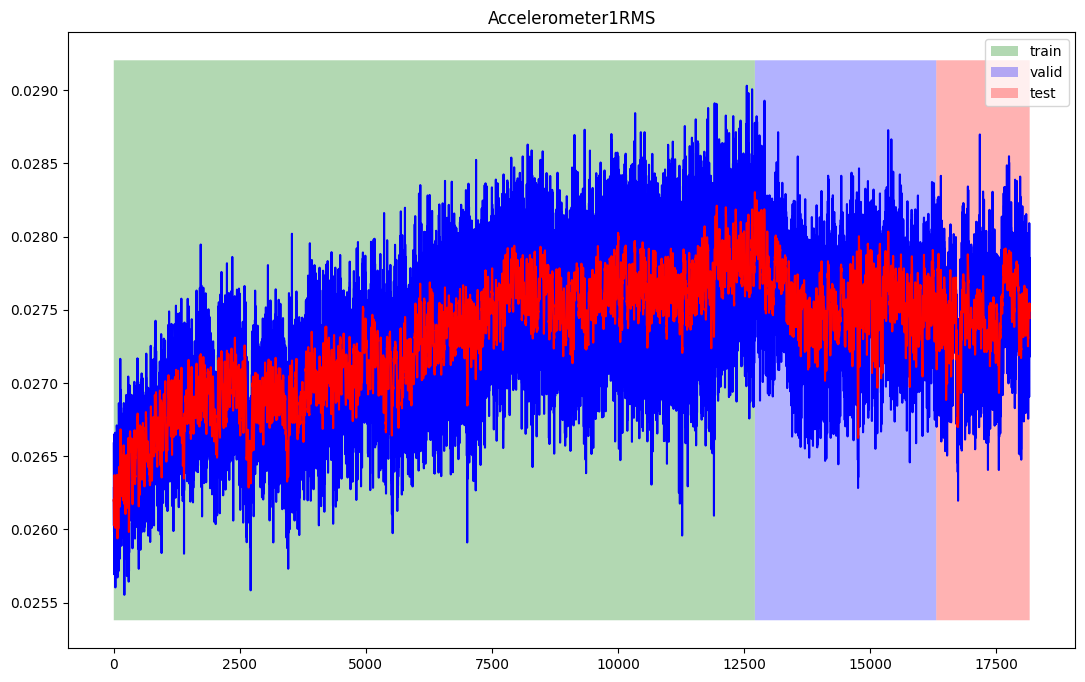

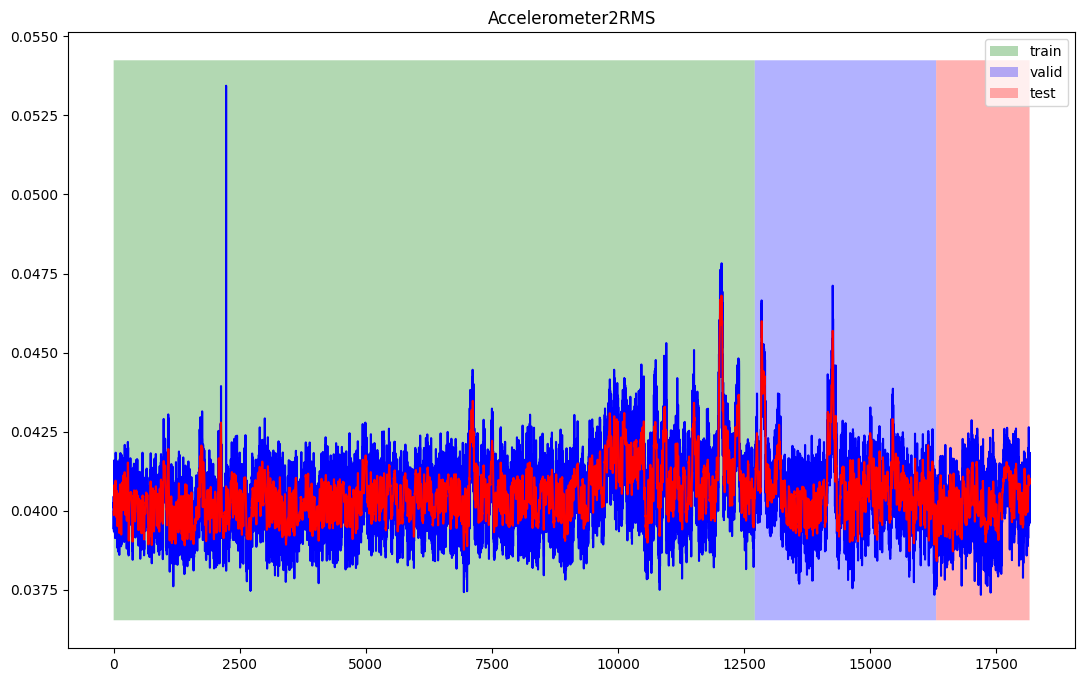

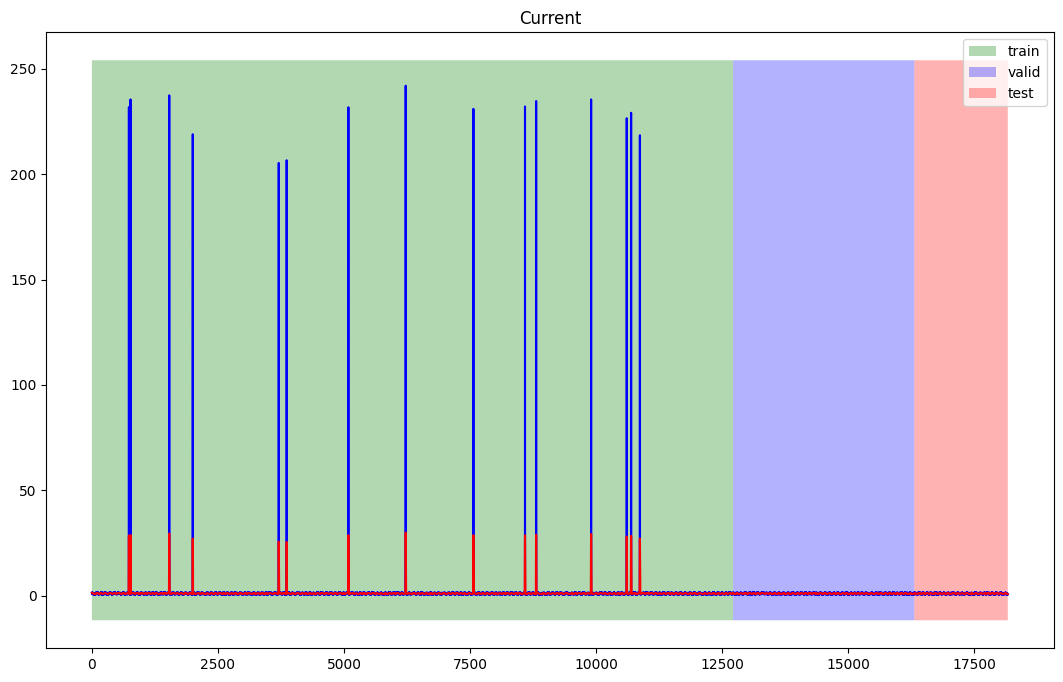

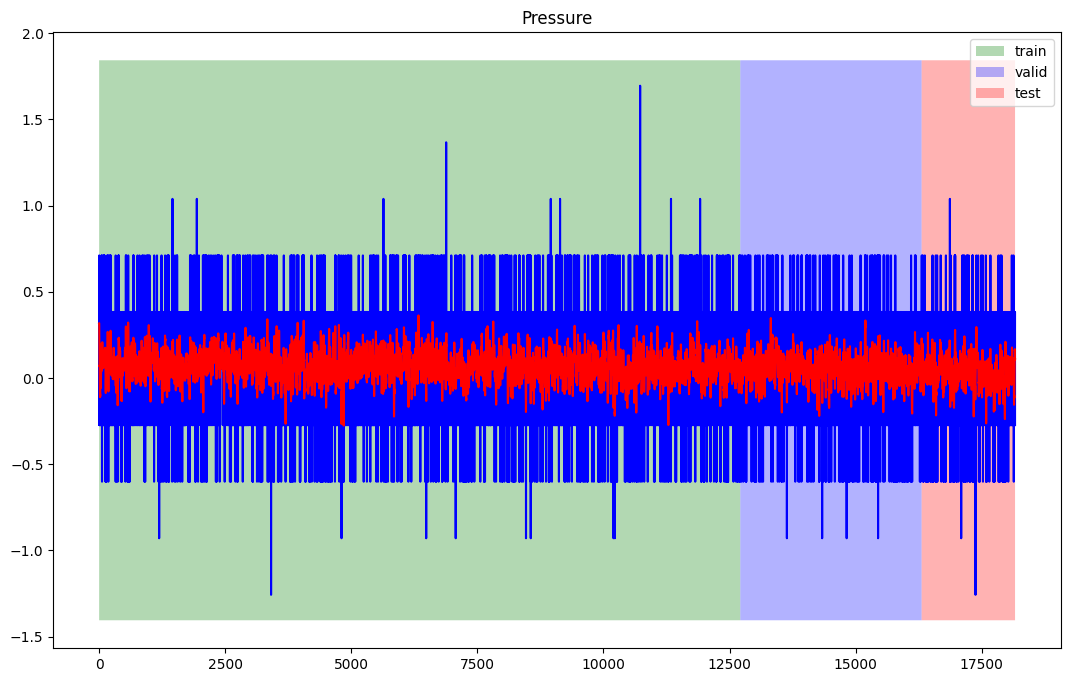

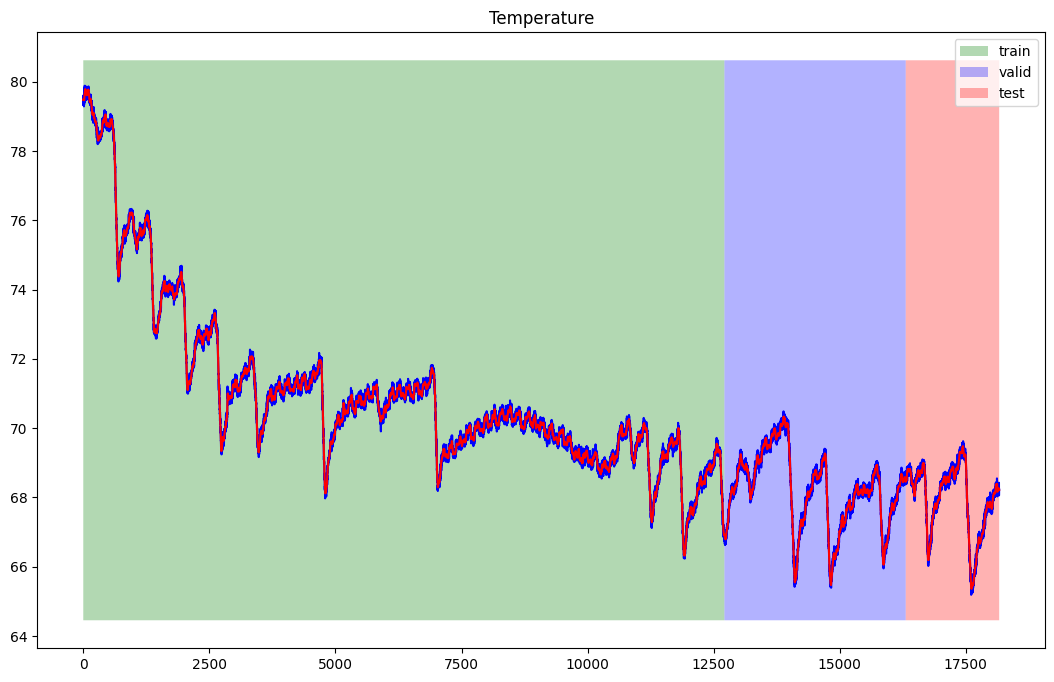

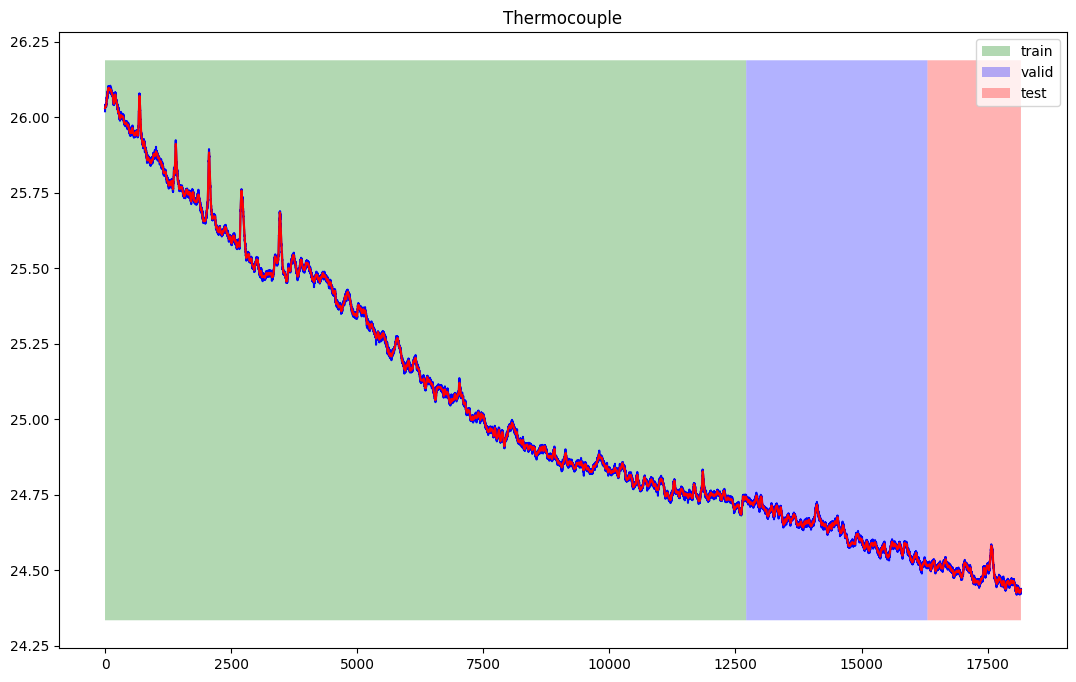

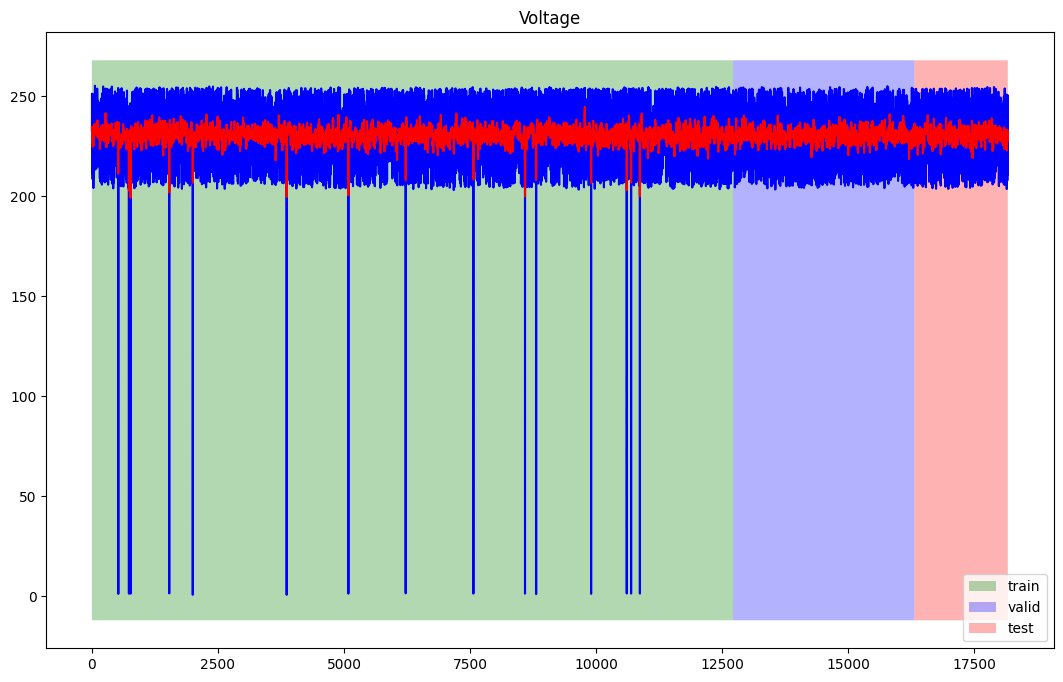

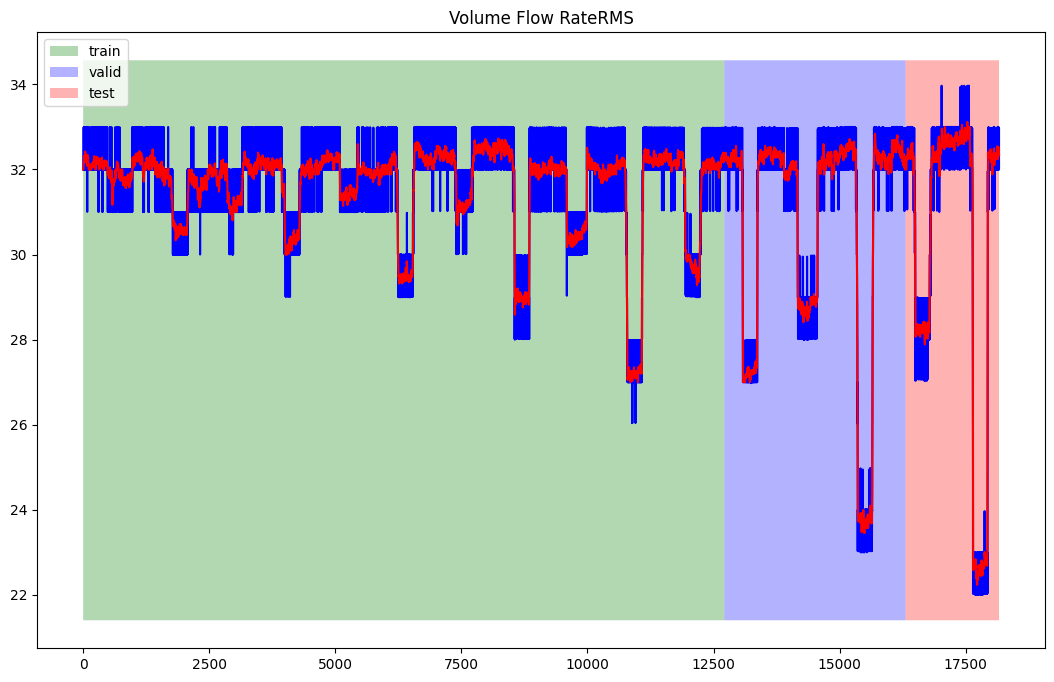

In [10]:
x1=np.arange(0,12713)
x2=np.arange(12713,16309)
x3=np.arange(16309,18162)

x_all_data=pd.concat([x_train,x_valid,x_test],ignore_index=False)

features=['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']
mat=np.concatenate([x_train_win,x_valid_win,x_test_win],axis=0)

x_all_data_win=pd.DataFrame(mat,columns=features)

for column in x_all_data.columns[:]:
    plt.figure(figsize=(13,8))
    plt.plot(x_all_data[column].values,color='b')
    plt.plot(x_all_data_win[column].values,color='r')
    ax=plt.gca()
    y_min,y_max=ax.get_ylim()
    
    y1=[y_min]*len(x1)
    y2=[y_max]*len(x1)
    plt.fill_between(x1,y1,y2,facecolor='g',alpha=0.3,label='train')
    
    y1=[y_min]*len(x2)
    y2=[y_max]*len(x2)
    plt.fill_between(x2,y1,y2,facecolor='b',alpha=0.3,label='valid')
    
    y1=[y_min]*len(x3)
    y2=[y_max]*len(x3)
    plt.fill_between(x3,y1,y2,facecolor='r',alpha=0.3,label='test')
    
    plt.legend()
    plt.title(column)
    plt.show()

In [11]:
# Generate instance for standardization
sc = StandardScaler()

# Calculate the transform matrix and it is applied to valid and test data
x_train_std = sc.fit_transform(x_train_win)
x_valid_std = sc.transform(x_valid_win)
x_test_std = sc.transform(x_test_win)

In [12]:
from vanilla_LSTM import Vanilla_LSTM

2024-03-01 12:23:55.376813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:

N_STEPS = 5
EPOCHS = 25
BATCH_SIZE = 32
VAL_SPLIT = 0.2
PARAMS = [N_STEPS, EPOCHS, BATCH_SIZE, VAL_SPLIT]
TEST_SPLIT = 400
Q = 0.99 # quantile for upper control limit (UCL) selection

In [14]:
model = Vanilla_LSTM(PARAMS)

In [15]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
predicted_outlier = []
predicted_cp = []
x_frea = []
y_frea = []
pred_frea = []

for df_name, df in valve1_dat.items():  # Iterate over the values of the dictionary
    X_train = df[:TEST_SPLIT].drop(['anomaly', 'changepoint'], axis=1)



    # scaler init and fitting
    StSc = StandardScaler()
    StSc.fit(X_train)

    # convert into input/output
    X, y = split_sequences(StSc.transform(X_train), N_STEPS)


    # model fitting
    model.fit(X, y)

    # results predicting
    residuals_train = pd.DataFrame(y - model.predict(X)).abs().sum(axis=1)
    UCL = residuals_train.quantile(Q) * 5

    # results predicting
    X, y = split_sequences(StSc.transform(df.drop(['anomaly', 'changepoint'], axis=1)), N_STEPS)
    lstm_residuals = pd.DataFrame(y - model.predict(X)).abs().sum(axis=1)
    prediction = pd.Series((lstm_residuals > UCL).astype(int).values,
                            index=df[N_STEPS:].index).fillna(0)
    
    x_frea.append(y)    
    y_frea.append(df['anomaly'][5:])

    pred_frea.append(prediction)

    # predicted outliers saving
    predicted_outlier.append(prediction)

    # predicted CPs saving
    prediction_cp = abs(prediction.diff())
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)



36/36 [==============================] - 0s 3ms/step


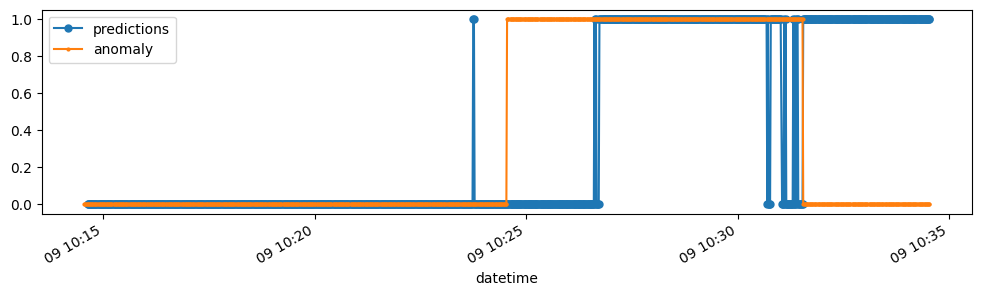

In [17]:
true_outlier = [df[1]['anomaly'] for df in valve1_dat.items()]

predicted_outlier[0].plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
true_outlier[0].plot(marker='o', markersize=2)
plt.legend();

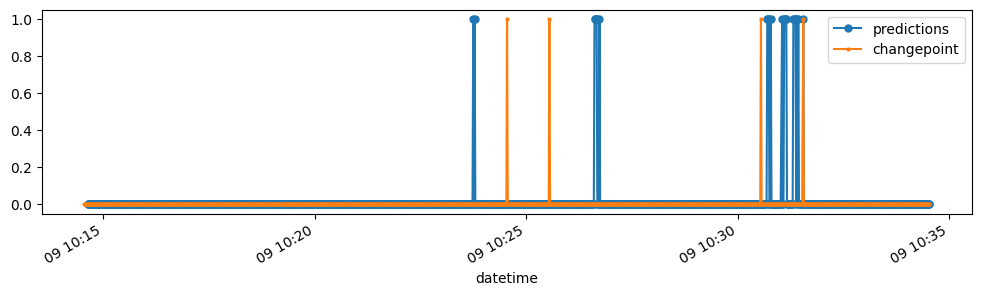

In [18]:
# true changepoint indices selection
true_cp = [df[1]['changepoint'] for df in valve1_dat.items()]

predicted_cp[0].plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
true_cp[0].plot(marker='o', markersize=2)
plt.legend();

In [19]:
binary = evaluating(
    true_outlier, 
    predicted_outlier, 
    metric='binary'
)

Since you not choose numenta_time and portion, then portion will be 0.1
False Alarm Rate 3.92 %
Missing Alarm Rate 69.14 %
F1 metric 0.45


In [20]:
# average detection delay metric calculation
add = evaluating(
    true_cp, 
    predicted_cp, 
    metric='average_time',
    anomaly_window_destenation='righter', 
    portion=1
)

Intersection of scoring windows(Timestamp('2020-03-09 10:28:31.800000'), Timestamp('2020-03-09 10:25:33'))
Intersection of scoring windows(Timestamp('2020-03-09 10:34:31.800000'), Timestamp('2020-03-09 10:31:33'))
Intersection of scoring windows(Timestamp('2020-03-09 10:48:32'), Timestamp('2020-03-09 10:45:33'))
Intersection of scoring windows(Timestamp('2020-03-09 10:54:32'), Timestamp('2020-03-09 10:51:34'))
Intersection of scoring windows(Timestamp('2020-03-09 13:48:37.600000'), Timestamp('2020-03-09 13:45:39'))
Intersection of scoring windows(Timestamp('2020-03-09 13:54:37.600000'), Timestamp('2020-03-09 13:51:39'))
Intersection of scoring windows(Timestamp('2020-03-09 14:08:38'), Timestamp('2020-03-09 14:05:40'))
Intersection of scoring windows(Timestamp('2020-03-09 14:14:39'), Timestamp('2020-03-09 14:11:41'))
Intersection of scoring windows(Timestamp('2020-03-09 14:28:39'), Timestamp('2020-03-09 14:25:40'))
Intersection of scoring windows(Timestamp('2020-03-09 14:34:39'), Timest

In [21]:
# nab metric calculation
nab = evaluating(
    true_cp, 
    predicted_cp, 
    metric='nab', 
    numenta_time='30S',
    anomaly_window_destenation='center', 
)

Standart  -  3.63
LowFP  -  -13.95
LowFN  -  11.94


# FreaAI

In [22]:
from freaAI import run_data_search

# X_train_columns = x_train.columns
# X_train_columns = [f'{col}_{i}' for i in range(N_STEPS) for col in X_train_columns]

XX = np.concatenate(x_frea)
YY = np.concatenate(y_frea)
predictions = np.concatenate(pred_frea)

accuracy_bool = (YY ==  np.array(predictions))
x_freaai = XX.copy()
x_freaai = pd.DataFrame(x_freaai, columns=df.columns.drop(['anomaly', 'changepoint']))
x_freaai["accuracy_bool"] = accuracy_bool

out = run_data_search(x_freaai, "LSTM")

100%|██████████| 28/28 [02:13<00:00,  4.76s/it]


In [23]:
# FreaAI output
out

,names,indicies,accuracies,method
0,Temperature-Current,"[[5044, 5045, 5046, 5047, 5048, 5049, 5050, 50...","[[0.0], [0.3662551440329218], [0.5], [0.463667...",DT
1,Pressure-Temperature,"[[5044, 5045, 5046, 5047, 5048, 5049, 5050, 50...","[[0.0], [0.3702127659574468], [0.4819494584837...",DT
2,Temperature-Voltage,"[[5044, 5045, 5046, 5047, 5048, 5049, 5050, 50...","[[0.0], [0.39615623062616245], [0.543103448275...",DT
3,Accelerometer1RMS-Temperature,"[[5044, 5045, 5046, 5047, 5048, 5049, 5050, 50...","[[0.0], [0.39615623062616245], [0.543103448275...",DT
4,Temperature-Accelerometer2RMS,"[[5044, 5045, 5046, 5047, 5048, 5049, 5050, 50...","[[0.0], [0.4564459930313589], [0.3559907834101...",DT
5,Accelerometer1RMS-Accelerometer2RMS,"[[667, 1013, 1029, 1052, 1128, 2059, 2314, 292...","[[0.25806451612903225], [0.6318327974276527], ...",DT
6,Temperature-Volume Flow RateRMS,"[[76, 296, 305, 373, 382, 483, 493, 502, 507, ...","[[0.2825], [0.0], [0.6206683168316832]]",DT
7,Current-Voltage,"[[11401, 11999, 12007, 12077, 12078, 12087, 12...","[[0.35294117647058826], [0.4117647058823529], ...",DT
8,Accelerometer1RMS-Current,"[[3160, 11999, 12007, 12077, 12325, 15872, 161...","[[0.375], [0.6443514644351465], [0.35294117647...",DT
9,Thermocouple-Temperature,"[[489, 492, 493, 496, 505, 512, 517, 522, 551,...","[[0.4650563607085346], [0.6607003891050583], [...",DT
